In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency
import statsmodels.api as sm

In [21]:
df_life_expect = pd.read_csv('Life Expectancy Data.csv')

In [22]:
df_life_expect

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [23]:
def data_summary_stats(df):
    try:
        df.info()
        # print the summary statistics
        print(df.describe())
        print(f'Shape of the Dataset is {df.shape}')
    except:
        print('Not a dataframe')

In [24]:
def stat_analysis_on_cols(df):
    
    # Identify numeric variables
    numeric_vars = df.select_dtypes(include=[np.number]).columns.tolist()
    print(f'Numeric variables:{numeric_vars}, count={len(numeric_vars)}')
    
    # Univariate analysis
    print("################# UniVariate Analysis Of Numeric Variables ####################")
    for var in numeric_vars:
        plt_num_univar_dist(var,df_life_expect)
    
   
    # Identify categorical variables
    categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
    print(f'Categorical variables:{categorical_vars}, count={len(categorical_vars)}')
    
    # Identify continuous variables
    continuous_vars = [var for var in numeric_vars if len(df[var].unique()) > 20]
    print(f'Continuous variables:{continuous_vars}, count={len(continuous_vars)}')
    
    return 

In [25]:
def plt_num_univar_dist(var_1,df):
    
    if df[var_1].dtype=='int64' or df[var_1].dtype == 'float64':
        # Box plot
        sns.boxplot(data=df, y=var_1)
        plt.show()

        # Violin plot
        sns.violinplot(data=df, y=var_1)
        plt.show()

        # Density plot
        sns.kdeplot(data=df, x=var_1)
        plt.show()

In [26]:
data_summary_stats(df_life_expect)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Numeric variables:['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling'], count=20
################# UniVariate Analysis Of Numeric Variables ####################


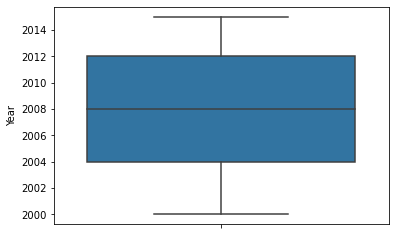

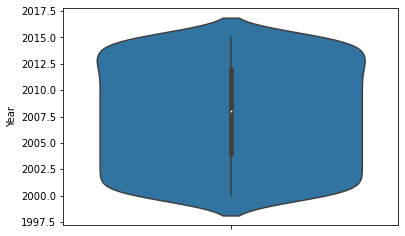

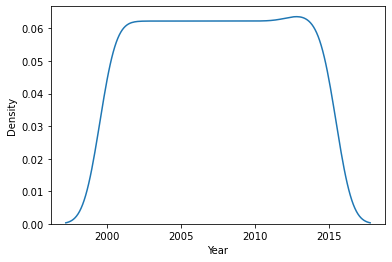

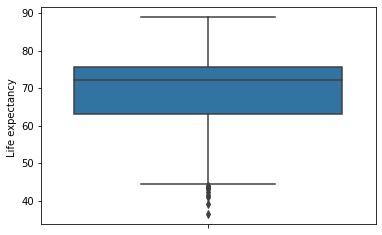

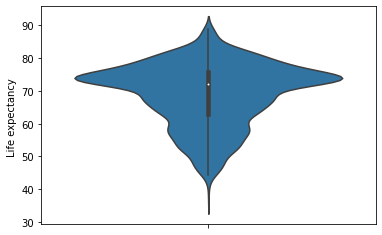

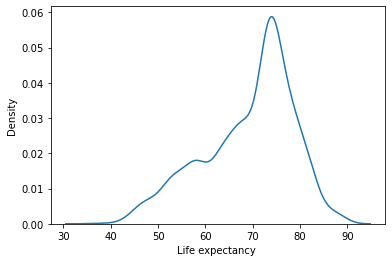

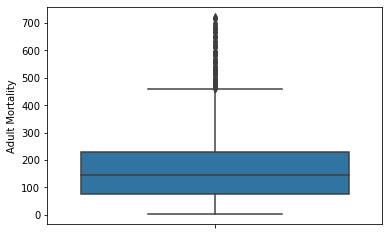

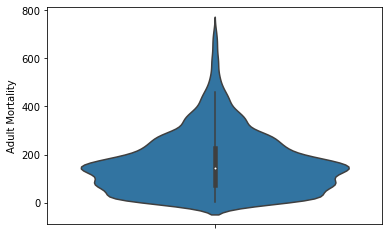

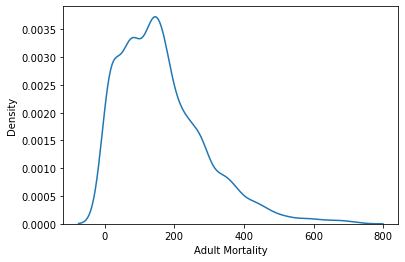

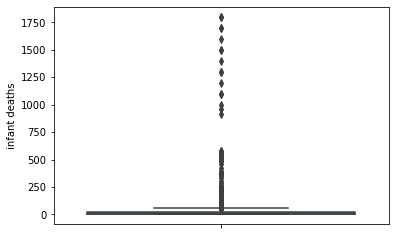

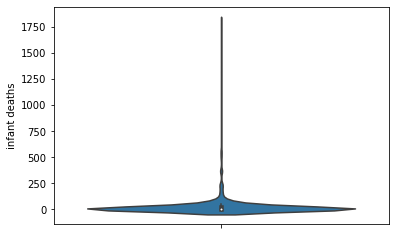

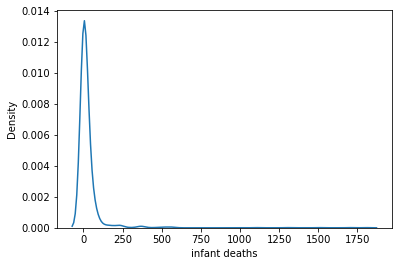

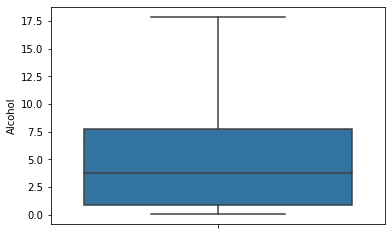

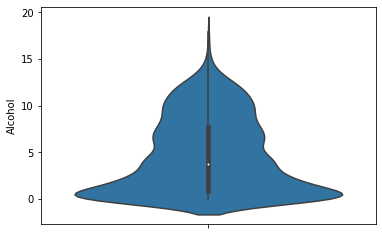

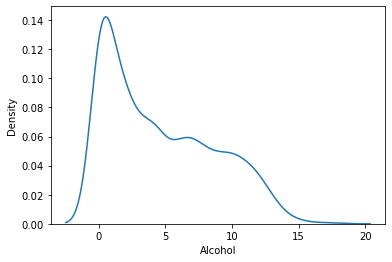

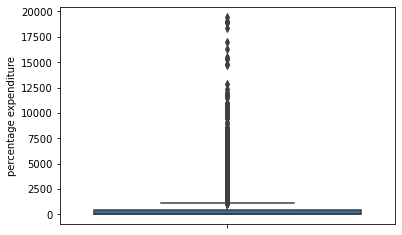

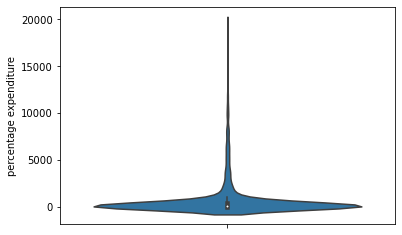

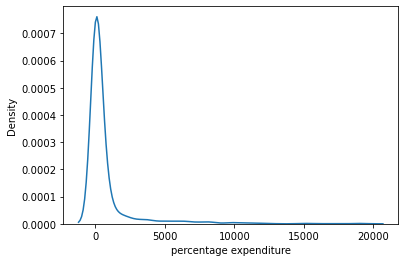

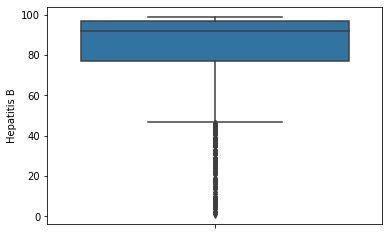

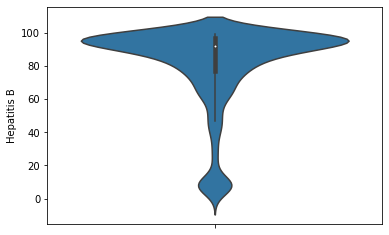

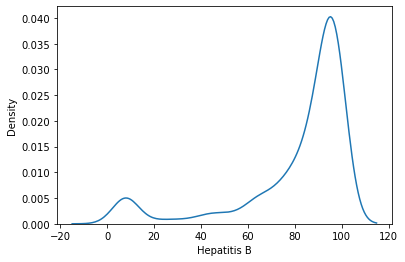

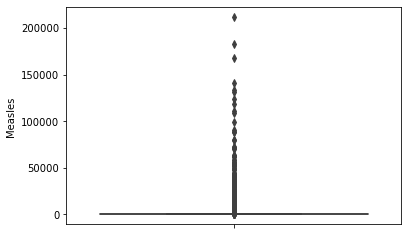

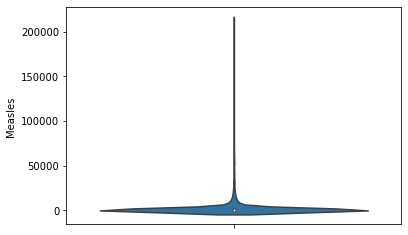

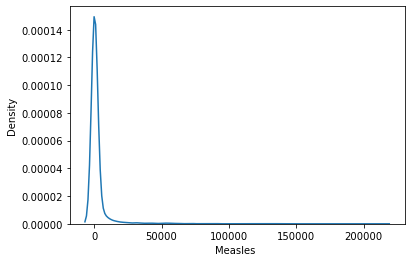

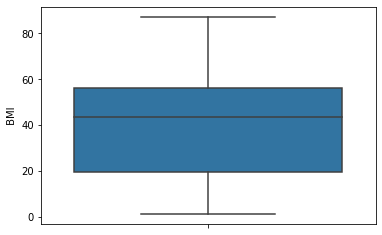

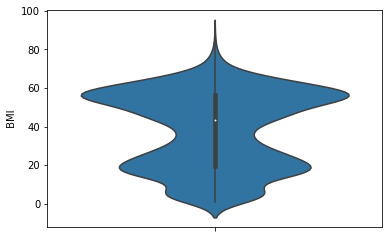

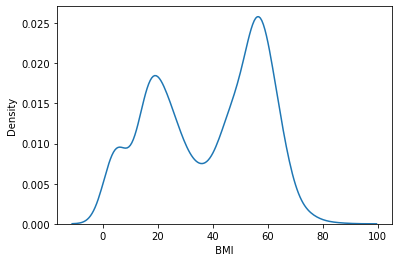

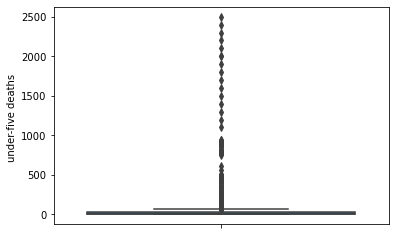

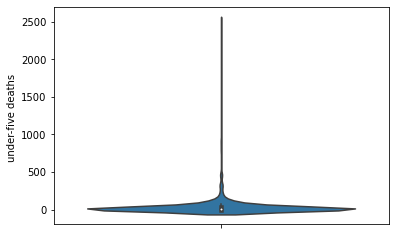

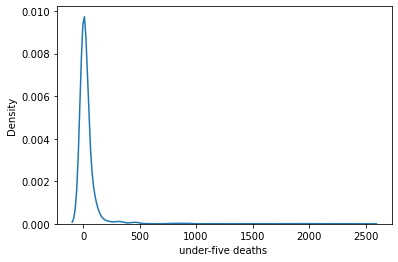

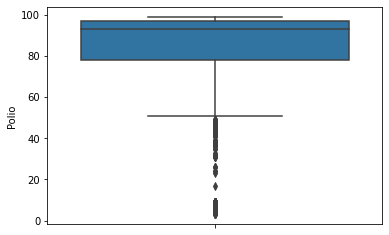

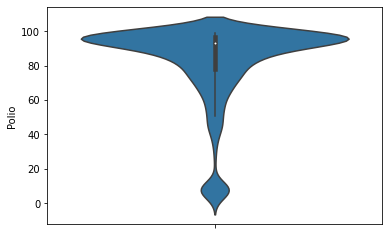

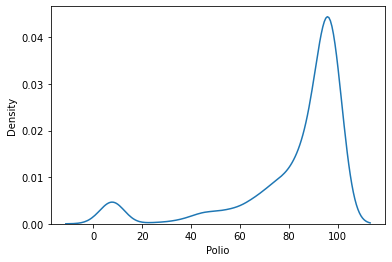

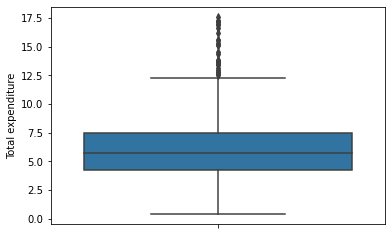

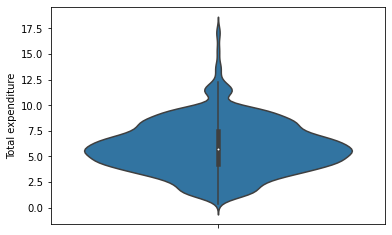

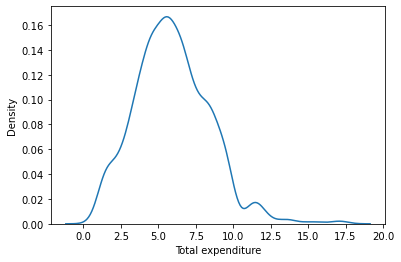

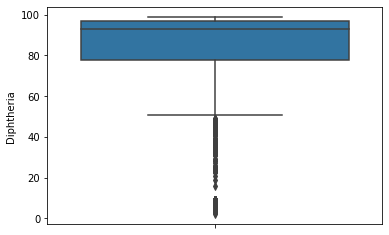

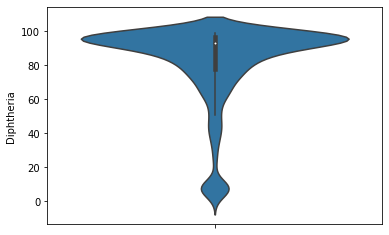

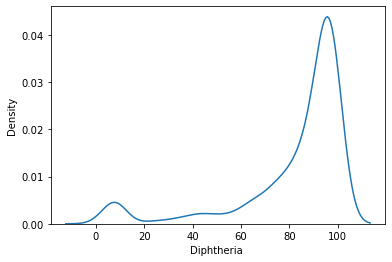

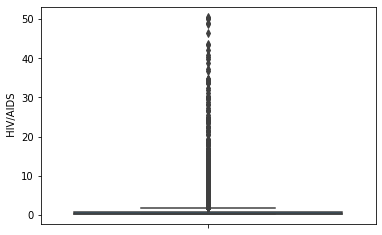

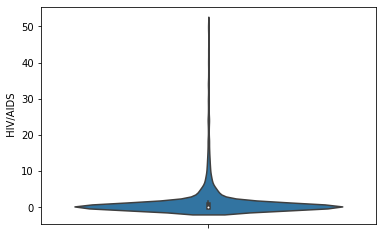

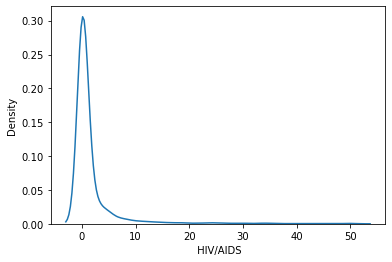

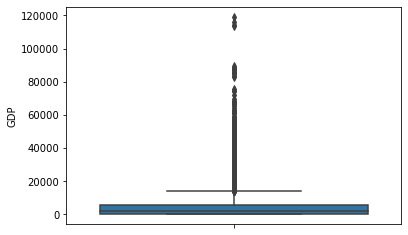

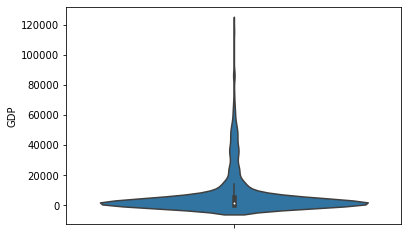

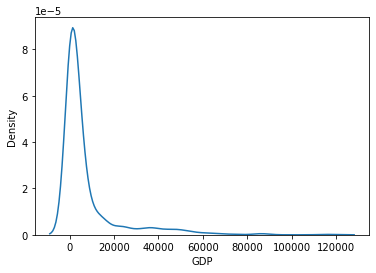

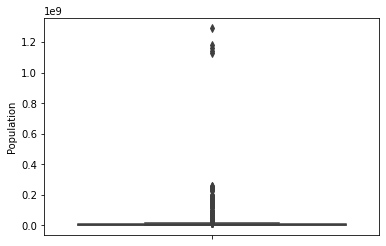

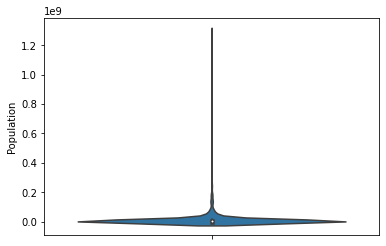

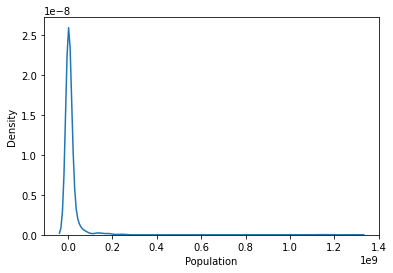

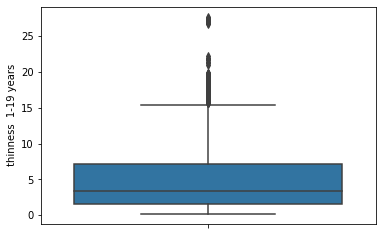

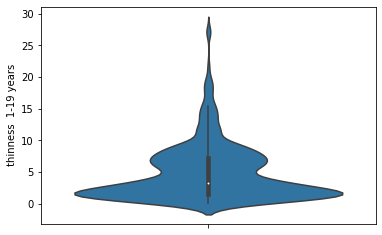

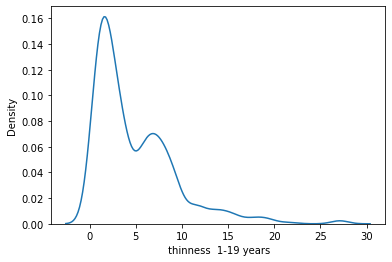

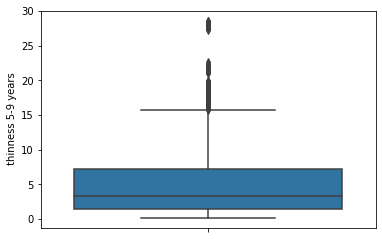

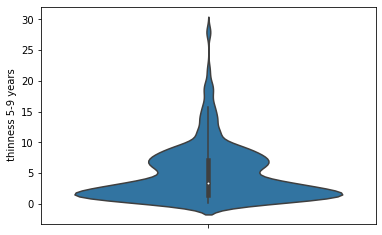

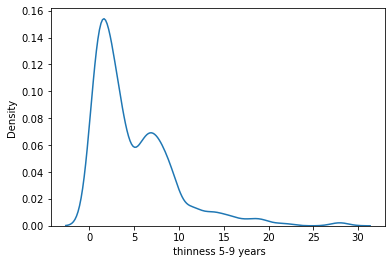

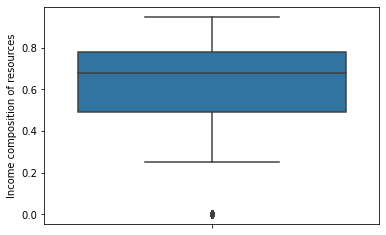

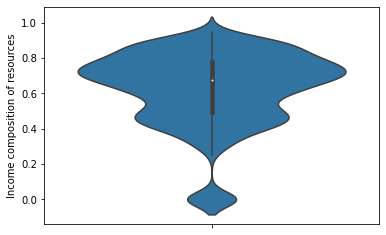

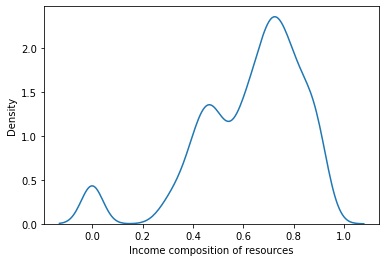

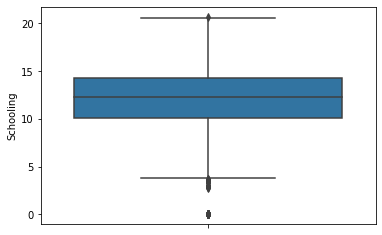

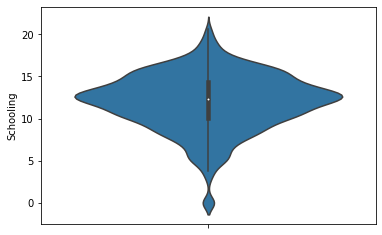

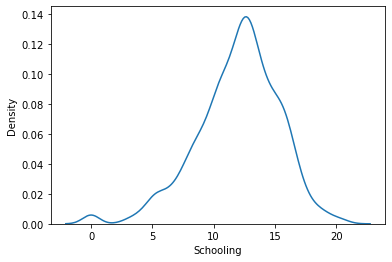

Categorical variables:['Country', 'Status'], count=2
Continuous variables:['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling'], count=19


In [27]:
stat_analysis_on_cols(df_life_expect)